<a href="https://colab.research.google.com/github/kankitakahiro/machin-learning/blob/main/colab_code/SGDmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install tensorflow-privacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: mpmath
    Found existing installation: mpmath 1.3.0
    Uninstalling mpmath-1.3.0:
      Successfully uninstalled mpmath-1.3.0
  Attempting uninstall: 

In [3]:
#%%
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras import datasets, layers, models, Sequential
import numpy as np
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
print(train_images.shape)

#%%
epochs = 10
batch_size = 250
learning_rate = 0.001
#%%
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3),
                            activation='relu',
                            input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPool2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3),
                            activation='relu'),
      tf.keras.layers.MaxPool2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3),
                            activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate,
                           momentum=0.0, 
                           decay=0.0, 
                           nesterov=False)

loss = tf.keras.losses.CategoricalCrossentropy(
    reduction=tf.losses.Reduction.NONE)
#%%
model.compile(optimizer=optimizer, 
              loss=loss,
              metrics=['accuracy'])
hist=model.fit(train_images, train_labels,
          epochs=epochs,
          validation_data=(test_images, test_labels),
          batch_size=batch_size)

#%%
# 正解率の評価
test_loss, test_acc = model.evaluate(test_images,  test_labels, batch_size = batch_size)

print('\nTest accuracy:', test_acc)
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


(50000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 12s 238us/sample - loss: 2.2618 - acc: 0.1484 - val_loss: 2.2834 - val_acc: 0.1238
Epoch 2/10
50000/50000 [==============================] - 2s 33us/sample - loss: 2.0766 - acc: 0.2477 - val_loss: 1.8975 - val_acc: 0.3307
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.7354 - acc: 0.3742 - val_loss: 1.7396 - val_acc: 0.3800
Epoch 4/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.5871 - acc: 0.4306 - val_loss: 1.4318 - val_acc: 0.4751
Epoch 5/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.4775 - acc: 0.4728 - val_loss: 1.4056 - val_acc: 0.4902
Epoch 6/10
50000/50000 [==============================] - 2s 32us/sample - loss: 1.3291 - acc: 0.5285 - val_loss: 1.3541 - val_acc: 0.5254
Epoch 7/10
50000/50000 [==============================] - 2s 34us/sample - loss: 1.2319 - acc: 0.5641 - val_loss: 1.2045 - val_acc: 0.5715
Epoch 8/10
50000/50000 [============

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[0.00787336 0.00203002 0.02874124 0.43037197 0.00956232 0.08615832
 0.3987122  0.00134609 0.03219041 0.00301416]
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


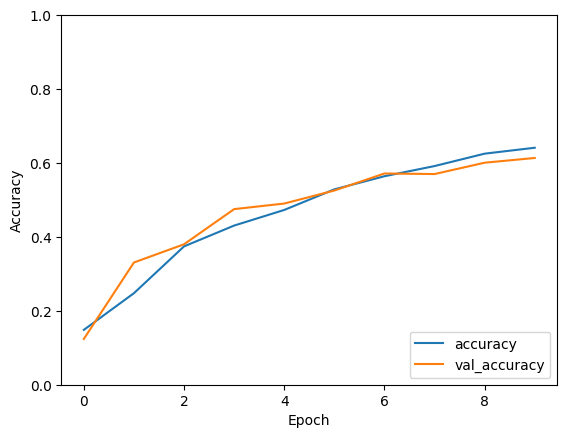

In [5]:
import numpy as np
import matplotlib.pyplot as plt
model.save_weights('/content/drive/MyDrive/2023_expt_saved_model/cifar10_sgd_simple.h5')
plt.plot(hist.history['acc'], label='accuracy')
plt.plot(hist.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
